# Computer Vision CSCI-GA.2272-001 Assignment 1, part 1.

Fall 2021 semester.

Due date: **September 30th 2021.**

## Introduction

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

You should perform this assignment in PyTorch by modifying this ipython notebook (File-->Save a copy...).

To install PyTorch, follow instructions at http://pytorch.org/

Please submit your assignment by uploading this iPython notebook to Brightspace.

## Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

Use `matplotlib` and ipython notebook's visualization capabilities to display some of these images.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 10 epochs (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. 
Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

Paste the output into your report.
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Training a Multi-Layer Network on MNIST [10%]

- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

## Training a Convolutional Network on CIFAR [25%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may find training is faster if you use a GPU runtime (RunTime-->Change Runtime Type-->GPU). 

- Give a breakdown of the parameters within the above model, and the overall number.

In [27]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [28]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

# Warmup

## get dataloader 

In [29]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
dataset = "mnist"
def get_dataloader(dataset = "mnist"):
    if dataset == 'mnist':
        data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
        testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
    
    elif dataset == 'mnist_limited':
        data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        torch.utils.data.Subset
        trainset = torch.utils.data.Subset(datasets.MNIST(root='.', train=True, download=True, transform=data_transform), indices = [i for i in range(50)])
        testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
        

    elif dataset == 'cifar10':
        data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
        trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
        testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
    test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
    return train_loader, test_loader

## Dataset Visulization

### mnist visulization

<Figure size 1440x1440 with 0 Axes>

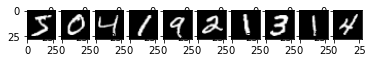

In [115]:
import matplotlib.pyplot as plt

# image index is within trainset
image_index = 0
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)



plt.figure(figsize=(20, 20))
f, axarr = plt.subplots(1,10) 
plt.subplot_tool()

for i in range(10):
    image, label = trainset[i]
    image = image.reshape((28, 28))
    axarr[i].imshow(image, cmap='gray')

plt.show()

### cifar10 visulization

Files already downloaded and verified


<Figure size 1440x1440 with 0 Axes>

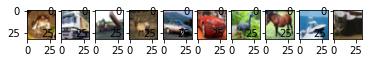

In [110]:
import matplotlib.pyplot as plt
import numpy as np
# image index is within trainset
image_index = 1

trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=None)
image, label = trainset[image_index]

# # # Plot
# plt.title()
# plt.imshow(image)

plt.figure(figsize=(20, 20))
f, axarr = plt.subplots(1,10) 
plt.subplot_tool()

for i in range(10):
    image, label = trainset[i]
    axarr[i].imshow(image, cmap='gray')

plt.show()

# Training a Single Layer Network on MNIST

In [32]:
## network and optimizer
# if dataset == 'mnist':
#     num_inputs = 784
# elif dataset == 'cifar10':
#     num_inputs = 3072

num_outputs = 10 
class SingleLayerNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(SingleLayerNet, self).__init__()
        self.num_inputs = num_inputs
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, self.num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = SingleLayerNet(num_inputs=784, num_outputs=10)
optimizer = optim.SGD(network.parameters(), lr=lr)

## training function

In [101]:
def train(cur_epoch, network, train_loader):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        device = next(network.parameters()).device
        # print(network)
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                cur_epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(network, test_loader):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        device = next(network.parameters()).device
        # print(network)
        data = data.to(device)
        target = target.to(device)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [34]:
train_loader, test_loader = get_dataloader("mnist")
for epoch in range(10):
    train(epoch, network, train_loader)
    test(network, test_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.511405
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.598343
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.516464
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.412161
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.471342
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.314806
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.366759
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.365511
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.312179
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.223389

Test set: Average loss: 0.3321, Accuracy: 9083/10000 (91%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.407421
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.388040
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.399596
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.247198
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.233113
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.539485
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.387585
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.240517
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.331763
T

## Network Weight Visulization
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: #1 #2 )

In [35]:
print(network)

SingleLayerNet(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [36]:
# import visdom
print(network.linear.weight.shape)
viz_data = network.linear.weight.reshape(10, 28, 28).detach().numpy()

torch.Size([10, 784])


In [37]:
import torchvision
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = torchvision.transforms.functional.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

<Figure size 432x288 with 0 Axes>

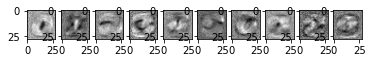

In [38]:
plt.figure()
f, axarr = plt.subplots(1,10) 
plt.subplot_tool()

for i in range(10):
    axarr[i].imshow(viz_data[i], cmap='gray')

<Figure size 432x288 with 0 Axes>

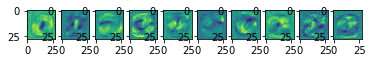

In [39]:
# show(viz_data)
plt.figure()
f, axarr = plt.subplots(1,10) 

for i in range(10):
    axarr[i].imshow(viz_data[i])


## Train with only 50 examples
(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the train function]. Paste the output into your report and explain what is happening to the model.

### training with only 50 examples(training_dataset_size = 50)

In [40]:
train_loader, test_loader = get_dataloader("mnist_limited")
for epoch in range(10):
    train(epoch, network, train_loader)
    test(network, test_loader)

Train Epoch: 0 [0/50 (0%)]	Loss: 0.176704

Test set: Average loss: 0.2764, Accuracy: 9211/10000 (92%)

Train Epoch: 1 [0/50 (0%)]	Loss: 0.163923

Test set: Average loss: 0.2768, Accuracy: 9214/10000 (92%)

Train Epoch: 2 [0/50 (0%)]	Loss: 0.153413

Test set: Average loss: 0.2774, Accuracy: 9210/10000 (92%)

Train Epoch: 3 [0/50 (0%)]	Loss: 0.144591

Test set: Average loss: 0.2781, Accuracy: 9215/10000 (92%)

Train Epoch: 4 [0/50 (0%)]	Loss: 0.137036

Test set: Average loss: 0.2788, Accuracy: 9215/10000 (92%)

Train Epoch: 5 [0/50 (0%)]	Loss: 0.130447

Test set: Average loss: 0.2796, Accuracy: 9207/10000 (92%)

Train Epoch: 6 [0/50 (0%)]	Loss: 0.124611

Test set: Average loss: 0.2804, Accuracy: 9202/10000 (92%)

Train Epoch: 7 [0/50 (0%)]	Loss: 0.119376

Test set: Average loss: 0.2812, Accuracy: 9203/10000 (92%)

Train Epoch: 8 [0/50 (0%)]	Loss: 0.114633

Test set: Average loss: 0.2821, Accuracy: 9195/10000 (92%)

Train Epoch: 9 [0/50 (0%)]	Loss: 0.110303

Test set: Average loss: 0.2828

We can observe that the test loss quickly begin to increase which may indicate overfitting. 

#  Training a Multi-Layer Network on MNIST 

## (in,1000) (1000,10)
- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.

In [55]:
class MLP(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(MLP, self).__init__()
        self.num_inputs = num_inputs
        self.net = nn.Sequential(nn.Linear(num_inputs, 1000), 
                                 nn.Tanh(),
                                 nn.Linear(1000, num_outputs))

    def forward(self, input):
        input = input.view(-1, self.num_inputs) # reshape input to batch x num_inputs
        output = self.net(input)
        return output

In [56]:
optimizer = optim.SGD(network.parameters(), lr=lr)

In [53]:
train_loader, test_loader = get_dataloader("mnist")
network = MLP(num_inputs=784, num_outputs=10)
optimizer = optim.SGD(network.parameters(), lr=lr)
for epoch in range(10):
    train(epoch, network, train_loader)
    test(network, test_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.294774
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.766907
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.431101
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.271675
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.338310
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.484052
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.386096
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.250017
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.617307
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.258417

Test set: Average loss: 0.3215, Accuracy: 9094/10000 (91%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.343855
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.363263
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.269906
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.293156
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.341459
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.276104
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.323892
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.286199
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.167438
T

The test accuracy is better than single layer

## learning_rata = 10
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

In [57]:
train_loader, test_loader = get_dataloader("mnist")
network = MLP(num_inputs=784, num_outputs=10)
optimizer = optim.SGD(network.parameters(), lr=10)
for epoch in range(10):
    train(epoch, network, train_loader)
    test(network, test_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.258000
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1785.792725
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1257.922607
Train Epoch: 0 [19200/60000 (32%)]	Loss: 419.371887
Train Epoch: 0 [25600/60000 (43%)]	Loss: 814.607239
Train Epoch: 0 [32000/60000 (53%)]	Loss: 258.325928
Train Epoch: 0 [38400/60000 (64%)]	Loss: 425.608337
Train Epoch: 0 [44800/60000 (75%)]	Loss: 242.129074
Train Epoch: 0 [51200/60000 (85%)]	Loss: 276.902618
Train Epoch: 0 [57600/60000 (96%)]	Loss: 327.732056

Test set: Average loss: 330.7383, Accuracy: 5514/10000 (55%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 359.660065
Train Epoch: 1 [6400/60000 (11%)]	Loss: 829.295593
Train Epoch: 1 [12800/60000 (21%)]	Loss: 637.358582
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1237.078247
Train Epoch: 1 [25600/60000 (43%)]	Loss: 348.999451
Train Epoch: 1 [32000/60000 (53%)]	Loss: 301.406311
Train Epoch: 1 [38400/60000 (64%)]	Loss: 164.288513
Train Epoch: 1 [44800/60000 (75%)]	Loss: 318.029083
Train Epoch:

A large learning rate will lead to an unstable learning schema/process(loss do no consistently decrease), and the model is hard to converge.

# Training a Convolutional Network on CIFAR
To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

## Training

In [105]:
class CNN(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(CNN, self).__init__()
        self.net = nn.Sequential( 
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(5,5)),
            nn.Tanh(),
            nn.MaxPool2d((2, 2)),
            nn.Conv2d(in_channels=16, out_channels=128, kernel_size=(5,5)),
            nn.Tanh(),
            nn.MaxPool2d((2, 2)),
            nn.Flatten(1,-1),
            nn.Linear(3200, 64),
            nn.Tanh(),
            nn.Linear(64,10)
        )

    def forward(self, input):
        output = self.net(input)
        # print(output.shape)
        return output
    

In [106]:
train_loader, test_loader = get_dataloader("cifar10")
network = CNN(num_inputs=3072, num_outputs=10).cuda()
optimizer = optim.SGD(network.parameters(), lr=0.01)
for epoch in range(20):
    train(epoch, network, train_loader)
    test(network, test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 0 [0/50000 (0%)]	Loss: 2.306343
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.129978
Train Epoch: 0 [12800/50000 (26%)]	Loss: 2.027687
Train Epoch: 0 [19200/50000 (38%)]	Loss: 2.072817
Train Epoch: 0 [25600/50000 (51%)]	Loss: 1.805655
Train Epoch: 0 [32000/50000 (64%)]	Loss: 1.981978
Train Epoch: 0 [38400/50000 (77%)]	Loss: 1.783425
Train Epoch: 0 [44800/50000 (90%)]	Loss: 1.891196

Test set: Average loss: 1.7544, Accuracy: 3836/10000 (38%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.879808
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.855603
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.873870
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.660474
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.650967
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.611355
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.570895
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.529107

Test set: Average loss: 1.5803, Accuracy: 4358/10000 (44%)

Train Epoch: 2

The model do no converge after 20 epochs.

## filter visulization

torch.Size([16, 3, 5, 5])


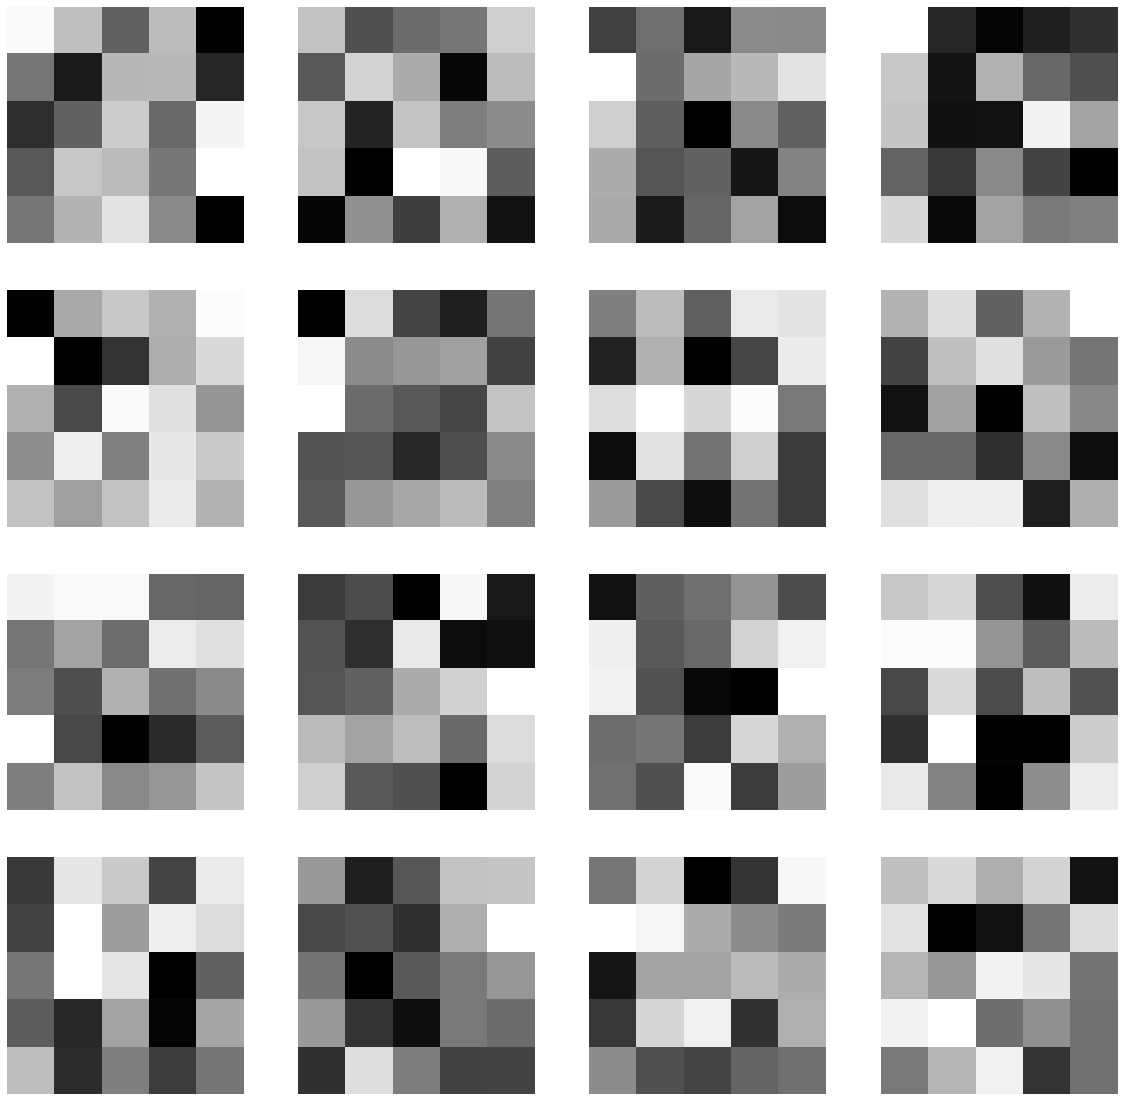

In [116]:
viz_data = model.net[0].weight
print(viz_data.shape)

plt.figure(figsize=(20, 20))
for i, filter in enumerate(viz_data):
    plt.subplot(4, 4, i+1) 
    plt.imshow(filter[0, :, :].cpu().detach(), cmap='gray')
    plt.axis('off')
plt.show()

## model summary
Give a breakdown of the parameters within the above model, and the overall number.

In [90]:
import torchvision.models as models
from torchsummary import summary

model = CNN(num_inputs=3072, num_outputs=10).cuda()
 
summary(model, (3, 32, 32))
# -1 represent the batch size here

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]           1,216
              Tanh-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4          [-1, 128, 10, 10]          51,328
              Tanh-5          [-1, 128, 10, 10]               0
         MaxPool2d-6            [-1, 128, 5, 5]               0
           Flatten-7                 [-1, 3200]               0
            Linear-8                   [-1, 64]         204,864
              Tanh-9                   [-1, 64]               0
           Linear-10                   [-1, 10]             650
Total params: 258,058
Trainable params: 258,058
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.46
Params size (MB): 0.98
Estimated T

Total params: 5,970 